Imports

In [56]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

Loading the data

In [78]:
# data_to_load = './Datasets/kryptonite-9-X.npy'
# labels_to_load = './Datasets/kryptonite-9-y.npy'
# data_to_load = './Datasets/kryptonite-12-X.npy'
# labels_to_load = './Datasets/kryptonite-12-y.npy'
data_to_load = './Datasets/kryptonite-15-X.npy'
labels_to_load = './Datasets/kryptonite-15-y.npy'
X = np.load(data_to_load)
y = np.load(labels_to_load)

Splitting and normalizing the data

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state= 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Initializing model

In [80]:
def create_model(num_features):
    model = tf.keras.Sequential([
        Input(shape=(num_features,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    # model.add(Dropout(0.2))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

Training model


In [81]:
# training hyperparameters
num_epochs = 50
batch_size = 32
validation_split = 0.2

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_counter = 1
accuracies = []

for train, val in kfold.split(X_train, y_train):
    model = create_model(X_train.shape[1])
    trained_model = model.fit(X_train[train], y_train[train], epochs=num_epochs, batch_size=batch_size, verbose=1, validation_data=(X_train[val], y_train[val]))
    scores = model.evaluate(X_train[val], y_train[val], verbose=0)
    accuracies.append(scores[1]) 
    print(f"Fold {fold_counter} Accuracy: {scores[1] * 100:.2f}%")
    fold_counter += 1

average_accuracy = np.mean(accuracies)
print(f"Average Accuracy: {average_accuracy}")

Epoch 1/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - accuracy: 0.4977 - loss: 0.7011 - val_accuracy: 0.5029 - val_loss: 0.6944
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.5210 - loss: 0.6921 - val_accuracy: 0.5029 - val_loss: 0.6941
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.5252 - loss: 0.6905 - val_accuracy: 0.5073 - val_loss: 0.6940
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.5507 - loss: 0.6874 - val_accuracy: 0.5192 - val_loss: 0.6920
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.5671 - loss: 0.6812 - val_accuracy: 0.5871 - val_loss: 0.6682
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.6250 - loss: 0.6431 - val_accuracy: 0.6567 - val_loss: 0.6088
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.6801 - loss: 0.5798 - val_accuracy: 0.6908 - val_loss: 0.5573
Epoch 8/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.7345 - loss: 0.5193 - 

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step
Accuracy: 0.90
Precision: 0.88
Recall: 0.92


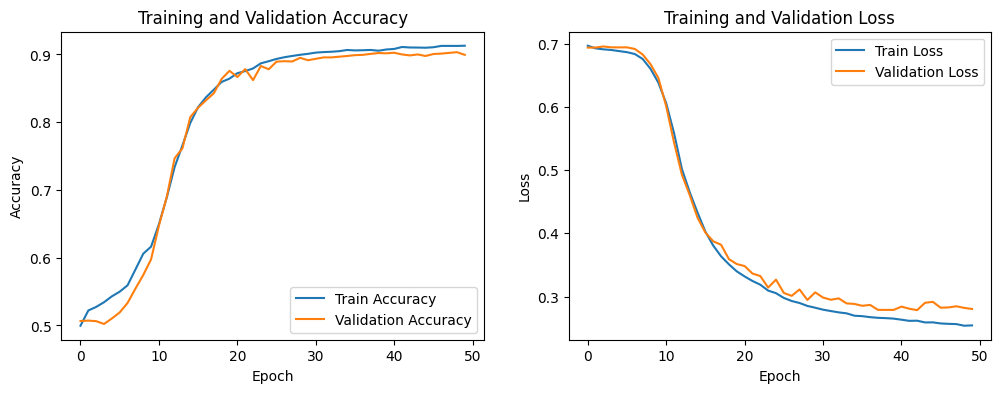

In [82]:
y_prediction_probabilities = model.predict(X_test).flatten()
y_preds = (y_prediction_probabilities > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(trained_model.history['accuracy'], label='Train Accuracy')
plt.plot(trained_model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(trained_model.history['loss'], label='Train Loss')
plt.plot(trained_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()